In [1]:
# Introducción

### Describir con lo que trabajamos, enumerar objetivos y su importancia

#! Describir los objetivos (con lo que vamos a trabajar)

#? Ejemplo: (Objetivo principal) Saber predecir si una transacción es fraudulenta o no
#?                               ¿De qué depende que una transaccion sea fraudulenta?
#?                               Si la cantidad sacada es alta, ¿hay mayor probabilidad de que sea fraudulenta?
#?                               ¿A que hora es más probable que haya una transacción fraudulenta?
#? Hasta 5 objetivos


# Datos
##? Describir la fuente de información
##? Variables disponibles
##? Datos recopilados (base de conocimiento)
##! Como se han preparado (limpieza, transformación, creación de variables, etc)
## Dificultades


# Clasificación

## Que modelo es mas apropiado (arbol de decisión, clasificación bayesiana, etc)
## ¿Qué variables son las mas importantes? ¿Por qué? ¿Cómo se puede mejorar el modelo?
## Se tiene que escoger el mas adecuado (hay que probarlos todos)


# Agrupamiento
## Mejor modelo para agrupamiento (basado en prototipos, jerárquico, etc)
### Se tiene que escoger el mas adecuado (hay que probarlos todos)


# Conlusión
## Como se usan nuestros modelos para mejorar la empresa


# Material consultado
## Bibliografía




# Datos de la base de conocimiento

## Variables Time V1-V28 Amount Fraud
## Septiembre de 2013
## 2 dias (Maximo 172792 segundos)


# Preguntas profesor
# Cuando comienza el tiempo. (Si el segundo 0 => 00:00)

## Paso a tipo numércio

In [2]:
import pandas as pd

def encode_categorical_columns(data):
    """
    Codifica las columnas no numéricas de un DataFrame en números.

    Parámetros:
    data (DataFrame): El DataFrame que se va a transformar.

    Retorna:
    DataFrame: El DataFrame transformado.
    """
    for col in data.columns:
        if not pd.api.types.is_numeric_dtype(data[col]):
            mask = ~data[col].isna() # Máscara booleana para valores no NaN
            codes, _ = pd.factorize(data.loc[mask, col])
            data[data.columns[data.columns.get_loc(col)]] = pd.Series(codes, index=data.loc[mask, col].index)
            
    return data

In [3]:
credit_df = pd.read_csv('./data/creditcard.csv')

#### No hay datos no numéricos ni faltantes

In [4]:
total_numeric = sum(
    not pd.api.types.is_numeric_dtype(credit_df[col])
    for col in credit_df.columns
)
emptyRowsAttr = credit_df.isnull().sum(axis=1).value_counts()

print(f'Hay {total_numeric} columnas no numéricas')

print('Valores nulos de cada columna:')
print(credit_df.isna().sum()) # Verifica que no haya valores NaN

Hay 0 columnas no numéricas
Valores nulos de cada columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### Analizamos si la clase objetivo está desbalanceado mirando los valores totales que toman la columna de Class

In [5]:
print(credit_df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


#### Clase muy desbalanceada

In [6]:
FEATURES = credit_df.drop(['Class'], axis=1) # Features
TARGET = credit_df['Class']                  # Target

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) # Crea un objeto SMOTE con semilla 42
X_sm, y_sm = smote.fit_resample(FEATURES, TARGET)

In [ ]:
credit_df_resampled = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(y_sm)], axis=1)
# credit_df_resampled.columns = credit_df_resampled.columns
credit_df_resampled.to_csv('./data/datos_credit_balanced.csv', index=False)

In [ ]:
print('Valores de la columna Class:')
credit_df_resampled['Class'].describe()

Valores de la columna Class:


count    568630.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Class, dtype: float64

#### Outliers

KeyboardInterrupt: 

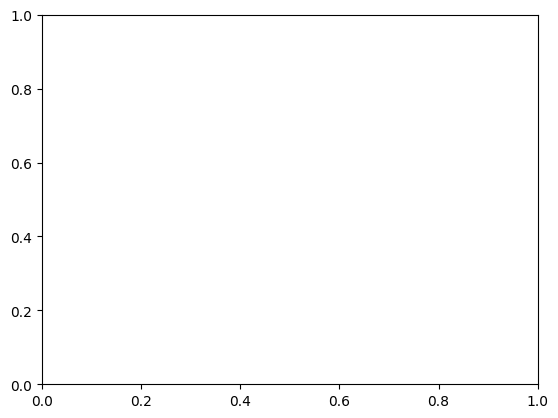

In [ ]:
from matplotlib import pyplot as plt

# drop column Class and Time
credit_df_resampled_test = credit_df_resampled.drop(['Class', 'Time'], axis=1)

for columna in credit_df_resampled_test:
    plt.boxplot(credit_df_resampled[columna])
    plt.title(columna)
    plt.savefig(f'./outliers/plots/boxplot_{columna}.png')
    plt.clf()

In [ ]:
import numpy as np

for column in credit_df_resampled_test.columns:
    Q1 = credit_df_resampled_test[column].quantile(0.25)
    Q3 = credit_df_resampled_test[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = credit_df_resampled_test[(credit_df_resampled_test[column] < Q1 - 1.5*IQR) | (credit_df_resampled_test[column] > Q3 + 1.5*IQR)]
    if len(outliers) > 0:
        txt_to_file = "--------------------------------------------------" + "\n"
        txt_to_file += f"Columna: {column}" + "\n"
        txt_to_file += f"Outliers: {len(outliers)}" + "\n"
        with open("./outliers/outliers_IQR.txt", "a") as file:
            file.write(txt_to_file)


In [ ]:
for column in credit_df_resampled_test.columns:
    media = np.mean(credit_df_resampled_test[column])
    desviacion_estandar = np.std(credit_df_resampled_test[column])
    umbral = 3 * desviacion_estandar
    outliers = credit_df_resampled_test[abs(credit_df_resampled_test[column] - media) > umbral]
    if len(outliers) > 0:
        info = f"Columna {column}: {len(outliers)} outliers" + "\n"
        with open("./outliers/outliers_3desviacion_estandar.txt", "a") as file:
            file.write(info)
        # print(f"Columna {column}: {len(outliers)} outliers")
        # print(f"Media: {media}")
        # print(f"Desviación estándar: {desviacion_estandar}")
        # print(f"Umbral para outliers: {umbral}")
        # print(f"Filas con  outliers:\n{outliers[column]}")

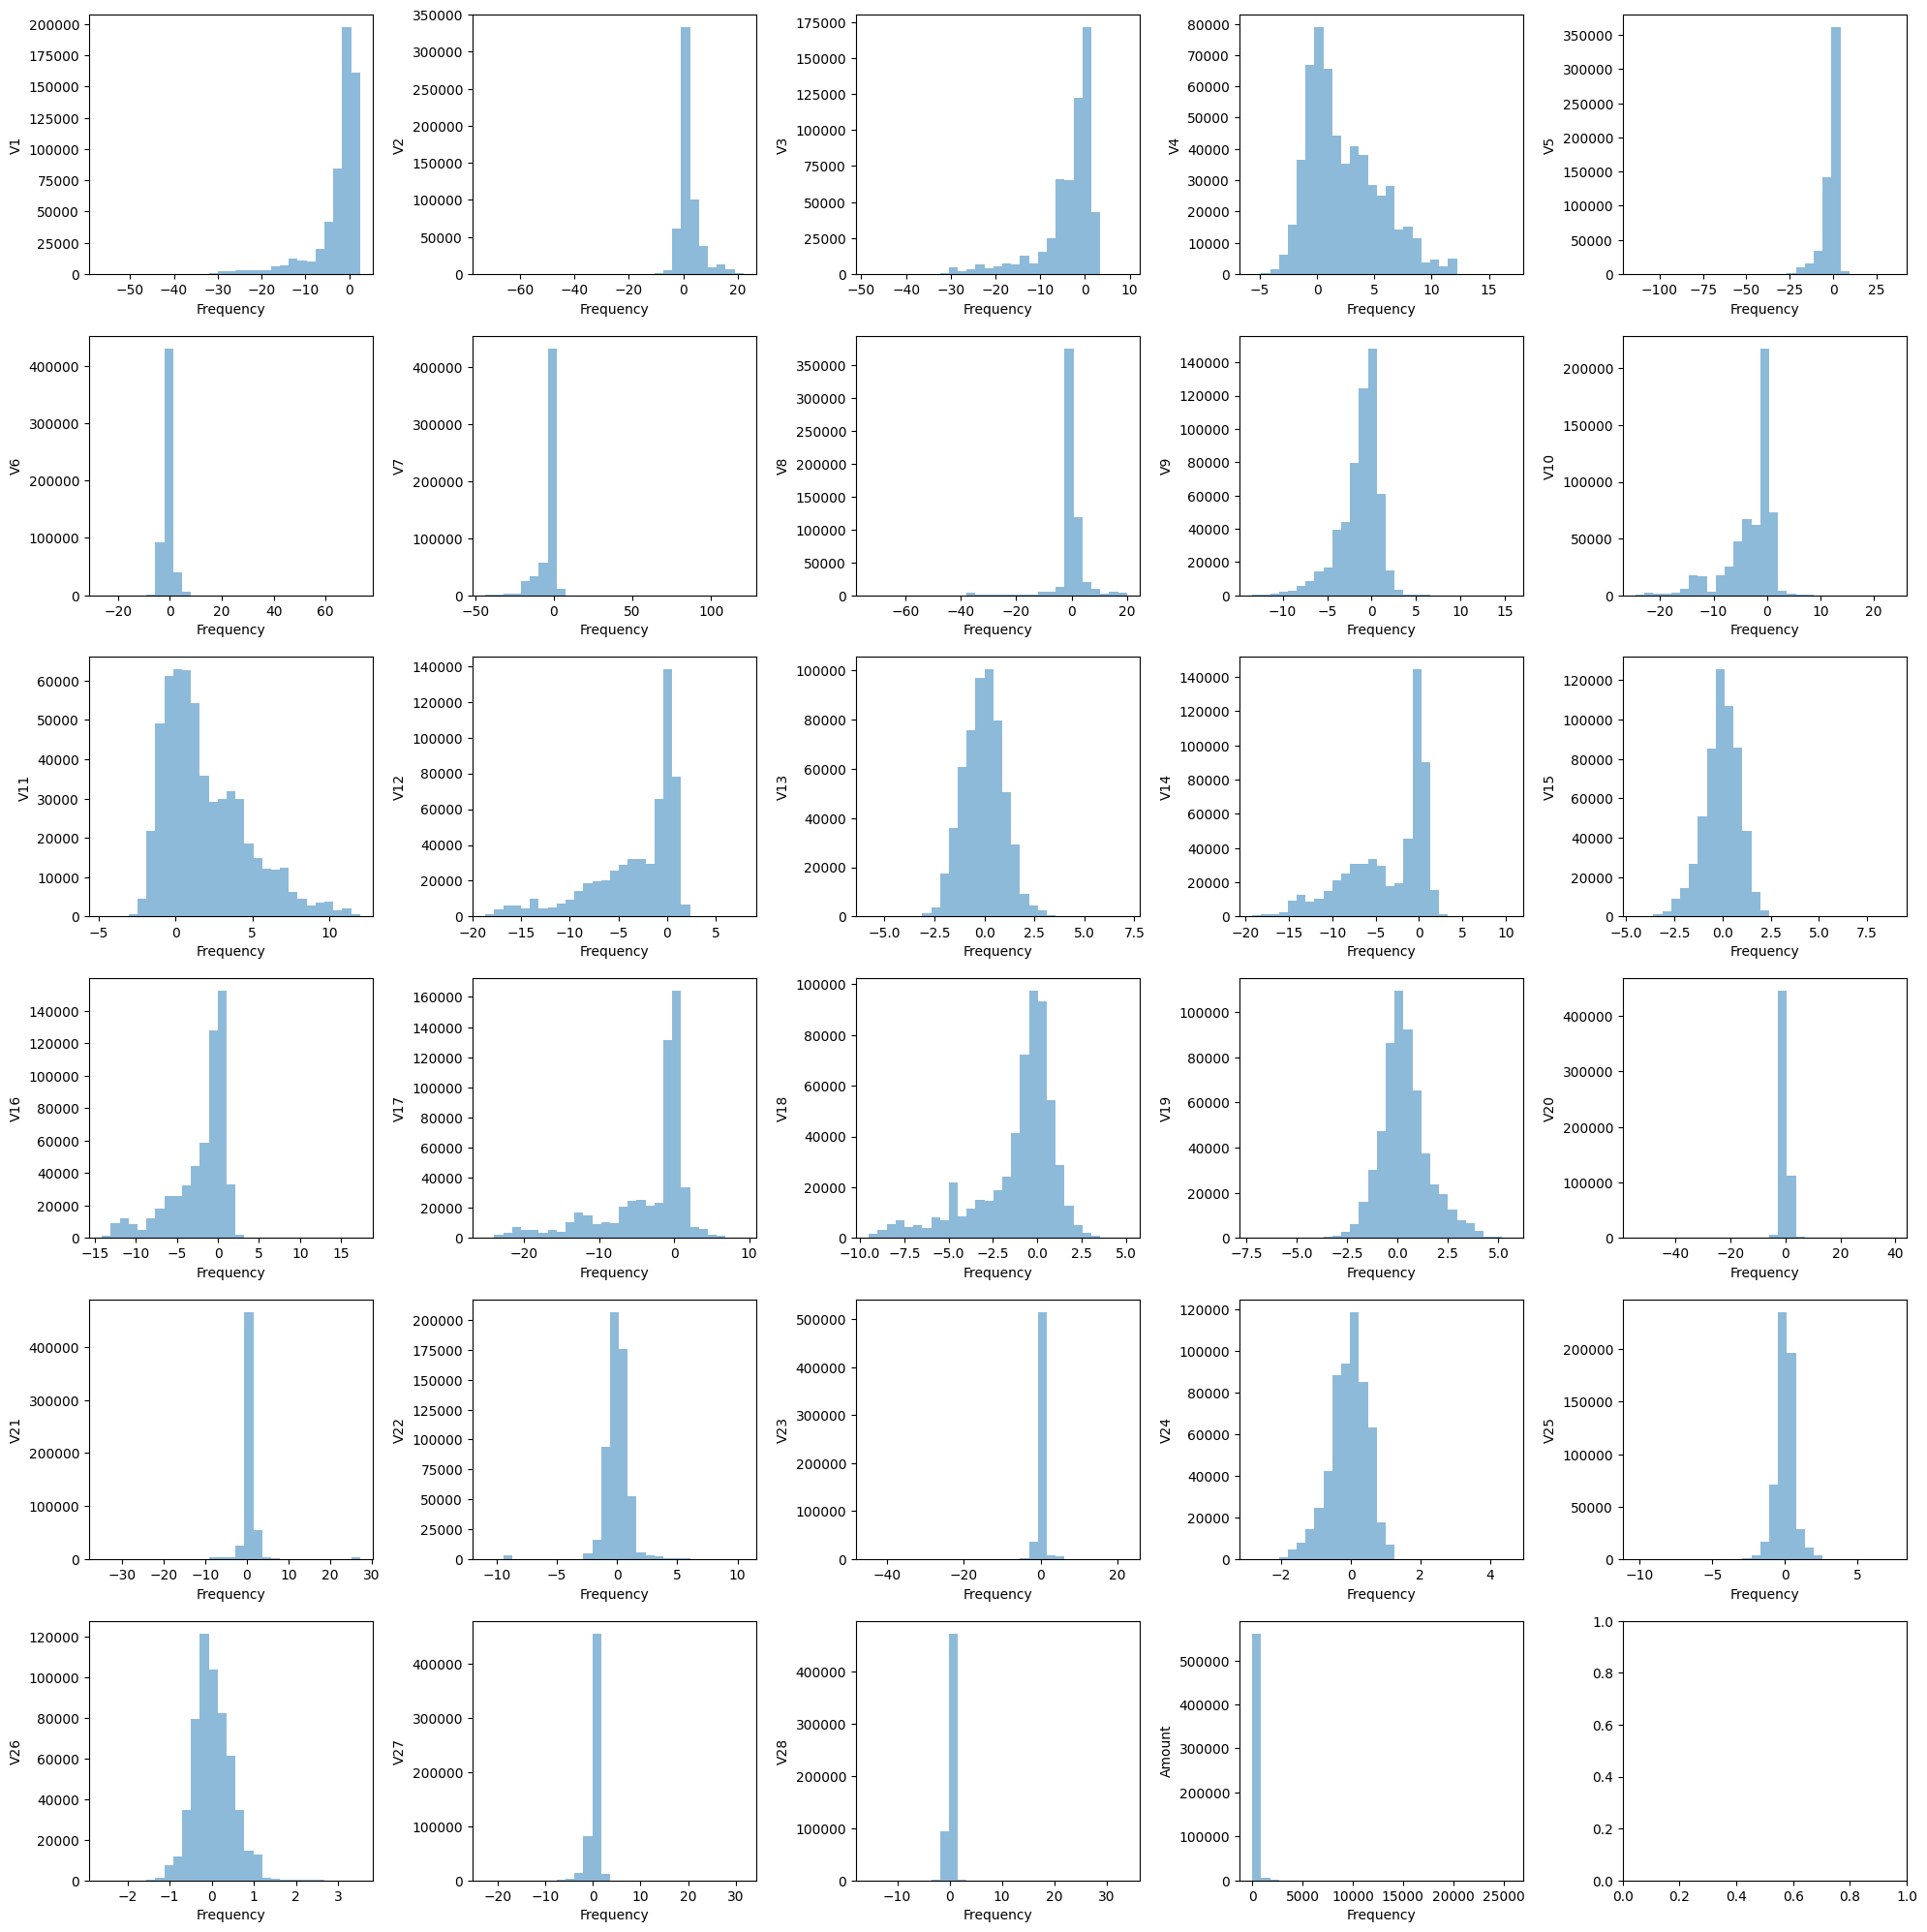

In [ ]:
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(credit_df_resampled_test.columns):
    axs[i].hist(credit_df_resampled_test[col], bins=29, orientation='vertical', alpha=0.5)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Frequency')
plt.tight_layout()
plt.savefig('./outliers/freq_histogram.png')

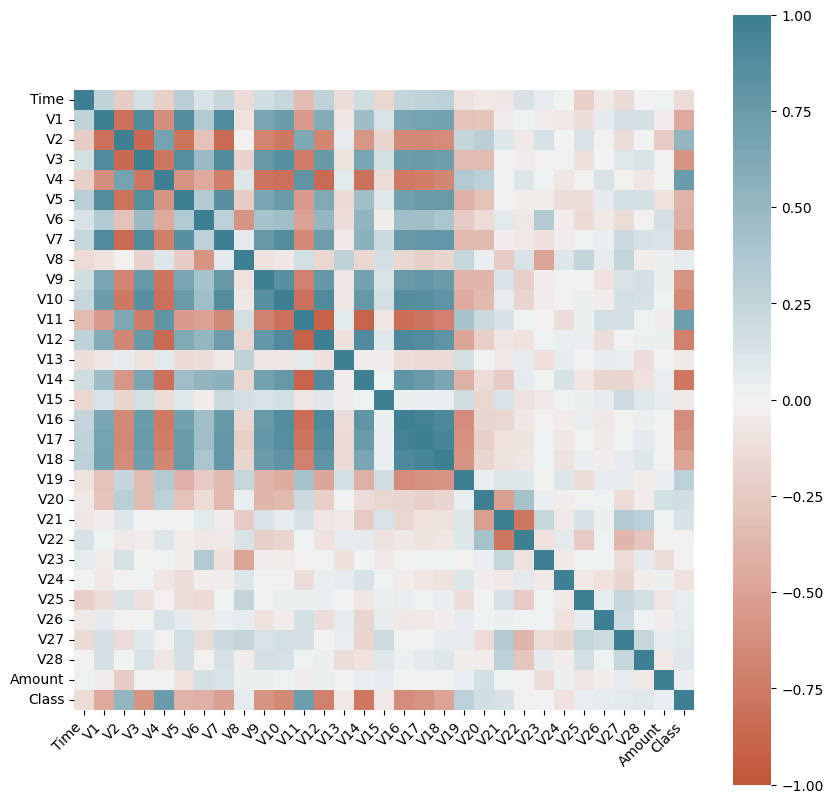

In [ ]:
import seaborn as sns

data_corr = credit_df_resampled.corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    data_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('./correlation_matrix.png')

In [ ]:
for i in range(len(credit_df_resampled.columns)):
    for j in range(i):
        if abs(data_corr.iloc[i, j]) > 0.88:
            print(data_corr.columns[i], data_corr.columns[j], data_corr.iloc[i, j])

V3 V1 0.886639549368773
V7 V1 0.8864715968558373
V7 V3 0.8917953243839568
V12 V10 0.8915353883540065
V12 V11 -0.9065661341077869
V14 V11 -0.8949913677963571
V14 V12 0.8861262266682038
V16 V12 0.9056954991970623
V17 V12 0.8813298872699891
V17 V16 0.9541467364020152
V18 V16 0.9079466992333602
V18 V17 0.9408661422832246


In [ ]:
credit_df_resampled = credit_df_resampled.drop(['V1', 'V7', 'V10', 'V11', 'V14', 'V16', 'V18'], axis = 1)
credit_df_resampled.to_csv('./data/datos_credit_balanced_sin_correlacion.csv', index=False)

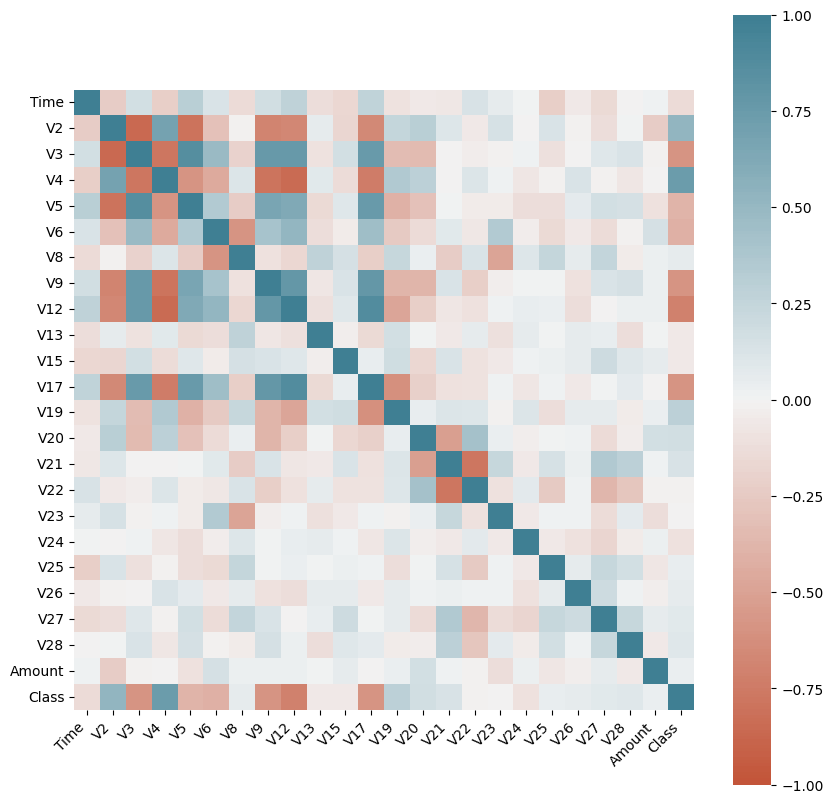

In [ ]:
data_corr = credit_df_resampled.corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    data_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('./correlation_matrix.png')

In [ ]:
for i in range(len(credit_df_resampled.columns)):
    for j in range(i):
        if abs(data_corr.iloc[i, j]) > 0.88:
            print(data_corr.columns[i], data_corr.columns[j], data_corr.iloc[i, j])

V17 V12 0.8813298872699891


#### Normalización

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
credit_df_resampled = pd.read_pickle('./pickled/datos_credit_balanced_sin_correlacion.pkl')

In [20]:
credit_df_resampled.iloc[:,0:-1] = scaler.fit_transform(credit_df_resampled.iloc[:,0:-1].to_numpy())
credit_df_resampled.to_csv('./data/datos_credit_balanced_sin_correlacion_normalizado.csv', index=False)
credit_df_resampled.to_pickle('./pickled/datos_credit_balanced_sin_correlacion_normalizado.pkl')